Answer all questions and submit them either as an IPython notebook, LaTeX document, or Markdown document. Each question is worth 25 points.

This homework is due Tuesday, October 24, 2017.

In [46]:
%matplotlib inline
import numpy as np
import pymc3 as pm
import pylab as plt
import pandas as pd

# Set seed
np.random.seed(10011)

# Question 1

Epidemiologists are interested in studying the sexual behavior of individuals at risk for HIV infection. Suppose 1500 gay men were surveyed and each was asked how many risky sexual encounters he had in the previous 30 days. Let $n_i$ denote the number of respondents reporting $i$ encounters, for $i = 1, \ldots , 16$. The DataFrame below contains these reponses:

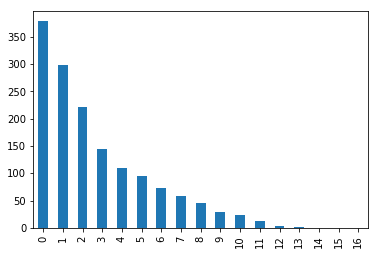

In [11]:
encounters = pd.DataFrame({'count': np.arange(17),
                          'freq': [379, 299, 222, 145, 109, 95, 73, 59,
                                  45, 30, 24, 12, 4, 2, 0, 1, 1]})

encounters.freq.plot.bar()

In [12]:
print(encounters.freq[0])

379


These data are poorly fitted by a Poisson model. It is more realistic to assume that the respondents comprise three groups. First, there is a group of people who, for whatever reason, report zero risky encounters even if this is not true. Suppose a respondent has probability $\alpha$ of belonging to this group. 

With probability $\beta$, a respondent belongs to a second group representing typical behavior. Such people respond truthfully, and their numbers of risky encounters are assumed to follow a $\text{Poisson}(\mu)$ distribution. 

Finally, with probability $1 − \alpha − \beta$, a respondent belongs to a high-risk group. Such people respond truthfully, and their numbers of risky encounters are assumed to follow a $\text{Poisson}(\lambda)$ distribution. 

The parameters in the model are $\alpha, \beta, \mu$ and $\lambda$. At the tth iteration of EM, we use $\theta^{(t)} = (\alpha^{(t)}, \beta^{(t)}, \mu^{(t)}, \lambda^{(t)})$ to denote the current parameter values. The likelihood of the observed data is given by:

$$L(\theta | n_0, \ldots, n_16) \propto \prod_{i=0}^{16} \left[ \frac{\pi_i(\theta)}{i!} \right]^{n_i}$$

where $\pi_i(\theta) = \alpha 1_{(i=0)} + \beta \mu^i \exp(-\mu) + (1-\alpha - \beta) \lambda^i \exp(-\lambda)$.

The observed data are in the `encounters` table above; the *complete* data may be construed to be $(n_{z,0}, n_{t,0}, n_{p,0}), \ldots, (n_{z,16}, n_{t,16}, n_{p,16})$, where $k = z, t, p$ correspond to zero, typical and promiscuous groups, respectively. That is, $n_0 = n_{z,0} + n_{t,0} + n_{p,0}$, and so on. Let $N = \sum_{i=0}^{16} n_i = 1500$.

Also define:

$$\begin{align}
z_0(\theta) &=& \frac{\alpha}{\pi_0(\theta)} \\
t_i(\theta) &=& \frac{\beta \mu^i \exp(-\mu)}{\pi_i(\theta)} \\
p_i(\theta) &=& \frac{(1-\alpha-\beta)\lambda^i \exp(-\lambda)}{\pi_i(\theta)}
\end{align}$$

which correspond to probabilities that respondents with $i$ risky encounters belong to various groups.

a. Show that the EM algorithm provides the following updates:

$$\begin{align}
\alpha^{(t+1)} &=& \frac{n_0 z_0(\theta^{(t)})}{N} \\
\beta^{(t+1)} &=& \sum_i \frac{n_i t_i(\theta^{(t)})}{N} \\
\mu^{(t+1)} &=& \frac{\sum_i i n_i t_i(\theta^{(t)})}{\sum_i n_i t_i(\theta^{(t)})} \\
\lambda^{(t+1)} &=& \frac{\sum_i i n_i p_i(\theta^{(t)})}{\sum_i n_i p_i(\theta^{(t)})}
\end{align}$$


b. Estimate the parameters of the model using the observed data.

#### From our notes: EM Algorithm
We can apply the EM algorithm to estimate $\theta = \{\alpha, \beta, \mu, \lambda\}$.

> **Initiazlize** $\theta_0 = \{\alpha_0, \beta_0, \mu_0, \lambda_0\}$
> 
> **Repeat until convergence:**
> 
> - **E-step**: guess the values of $\{z_i\}$ Note: true values of z's will be 0 or 1, but we'll estimate weights
> 
>     Compute probabilities of group membership: $w_{ij} = P(z_i = j | x_i, \theta)$ for each group $j=1,\ldots,k$. This is done via Bayes' formula:
>     
>     $$P(z_i = j | x_i) = \frac{P(x_i | z_i=j) P(z_i=j)}{\sum_{l=1}^k P(x_i | z_i=l) P(z_i=l)}$$
>     
>     $\theta$ has been dropped for notational convenience.
>     
> - **M-step**: update estimates of parameters $\theta$
> 

### Answer 1.A
Show that the EM algorithm provides updates shown above.

We can define $$Q_i(z_i) = P(z_i \,|\, x_i, \alpha, \beta, \mu, \lambda)$$

The goal of the M step is to find $\theta$ that maximizes Q, the computed expectation of (P) in the E step.  Therefore the parameter updates are given by the below equation.

![alt text](EM_fig.png "EM")

Thus the expectation of the log-likelihood is
$$E(logL(\theta|y)|X, \theta^{t}) $$
$$= E(log(const) + n_{z0}log[z_0(\theta^t)] + ... n_{t16}log[t_{16}(\theta^t)] + n_{p16}log[p_{16}(\theta^t)]$$
$$ =log(const)+n_{z0}(\theta)log[z_0(\theta^t)]+...+n_{t16}(\theta)log[t_16(\theta^t)]+n_{p16}(\theta)log[p_16(\theta^t)] $$

When you take the partial derivatives with respect to zero, you can maximize the expectation of the log-likelihood:

$$\frac{\delta E(logL(θ|y)|X,θt)}{\delta \alpha}=0, \alpha^{(t+1)} = \frac{n_0 z_0(\theta^{(t)})}{N} $$
$$\frac{\delta E(logL(θ|y)|X,θt)}{\delta \beta}=0, \beta^{(t+1)} = \sum_i \frac{n_i t_i(\theta^{(t)})}{N} $$
$$\frac{\delta E(logL(θ|y)|X,θt)}{\delta \mu}=0, \mu^{(t+1)} = \frac{\sum_i i n_i t_i(\theta^{(t)})}{\sum_i n_i t_i(\theta^{(t)})} $$
$$$$\frac{\delta E(logL(θ|y)|X,θt)}{\delta \lambda}=0, \lambda^{(t+1)} = \frac{\sum_i i n_i p_i(\theta^{(t)})}{\sum_i n_i p_i(\theta^{(t)})} $$

### Answer 1.B
Estimate the parameters of the model using the observed data.

In [13]:
from scipy.stats.distributions import poisson
from scipy.stats import distributions as dist

In [14]:
pi = lambda a, b, m, l, i: a*(i==0) + b*(m**i)*np.exp(-m)+(1-a-b)*(l**i)*np.exp(-l)

In [15]:
t = np.zeros(17)
p = np.zeros(17)
def e_step(x, alpha, beta, mu, lamb):
    z = (alpha)/pi(alpha, beta, mu, lamb, 0) 
    for i in range(17):
        t[i] = (beta)*mu**i*np.exp(-mu) / (pi(alpha, beta, mu, lamb, i))
        p[i] = (1- alpha - beta)*lamb**i*np.exp(-lamb) / (pi(alpha, beta, mu, lamb, i))
    return z,t,p
    

In [16]:
def m_step(x, z,t,p):
    beta = 0
    lamb_top = 0
    lamb_bot = 0
    mu_top = 0
    mu_bot = 0
    alpha = encounters.freq[0]*z/ N
    for i in range(17):
        beta = beta+(encounters.freq[i]*t[i])/N
        mu_top = mu_top+(encounters.freq[i]*i*t[i])
        mu_bot = mu_bot + (encounters.freq[i]*t[i])
        lamb_top = lamb_top+(encounters.freq[i]*i*p[i])
        lamb_bot = lamb_bot + (encounters.freq[i]*p[i])
    mu = mu_top/mu_bot
    lamb = lamb_top/lamb_bot
    
    return alpha, beta, mu, lamb

In [17]:
# Initialize values completely randomly
mu = 2
lamb = 15
alpha = np.random.uniform(0,1)
beta = np.random.uniform(0, 1 - alpha) #to make sure 1-alpha-beta > 0
# Stopping criterion
crit = 1e-4
N = 1500
# Convergence flag
converged = False

# Loop until converged
while not converged:
    
    # E-step
    z,t,p = e_step(encounters.freq, alpha, beta, mu, lamb)
    # M-step
    alpha_new, beta_new, mu_new, lamb_new = m_step(encounters.freq, z, t, p)
    
    # Check convergence: check different between current and next value less than criterion
    converged = ((np.abs(alpha_new - alpha) < crit) 
                 & (np.abs(beta_new-beta) < crit)
                 & (np.abs(mu_new-mu) < crit)
                 & (np.abs(lamb_new - lamb) < crit))
    alpha, beta, mu, lamb = alpha_new, beta_new, mu_new, lamb_new
                
print('Alpha: {0:.4f}\nBeta: {1:.4f}\nMu: {2:.4f} \nLambda: {3:.4f}'.format(
                        alpha_new, beta_new, mu_new, lamb_new))

Alpha: 0.1223
Beta: 0.5625
Mu: 1.4683 
Lambda: 5.9399


> Looks good!

> Q1 Total score: 25/25

# Question 2

Suppose $y$ has a binomial distribution with parameters $n$ and $p$, and we are interested in the log-odds value $\theta = \log(p/(1 − p))$. Our prior for $\theta$ is that $\theta \sim N(\mu, \sigma^2)$. It follows that the posterior density of $\theta$ is given, up to a proportionality constant, by:

$$\pi(\theta | y) \propto \frac{\exp(y\theta)}{(1 + exp(\theta))^n} \exp\left[\frac{-(\theta − \mu)^2}{2\sigma^2}\right]$$

For example, suppose we are interested in learning about the probability that a possibly-biased coin lands heads when tossed. *A priori* we believe that the coin is fair, so we assign $\theta$ a $N(0,.25)$ prior. We toss the coin $n = 5$ times and obtain $y = 5$ heads.

1. Using a normal approximation to the posterior density, compute the probability that the coin is biased toward heads (i.e., that θ is positive).
2. Using the prior density as a proposal density, design a rejection algorithm for sampling from the posterior distribution. Using simulated draws from your algorithm, approximate the probability that the coin is biased toward heads.
3. Using the prior density as a proposal density, simulate values from the posterior distribution using the SIR algorithm. Approximate the probability that the coin is biased toward heads.

### Answer 2.1
Using a normal approximation to the posterior density, compute the probability that the coin is biased toward heads (i.e., that θ is positive).

To find the mean of the normal approximation, we want to find the theta that maximizes our posterior distribution (i.e., the mode) and use this value for the mean of the normal. 

In [22]:
import sympy as sym
#optimize posterior to find mean and variance for normal approximation
#posterior ~ normal
#prior ~ normal(0, .25)
#y ~ binomial distribution
#n = 5, y = 5 heads
theta, mu, y, n, var = sym.symbols("theta mu y n var")
#f is the posterior
f = sym.exp(y*theta)*sym.exp(-(theta-mu)**2/(2*var**2))/(1+sym.exp(theta))**n
def func(param_array, y = 5, n = 5):
    theta, mu, var = param_array[0], param_array[1], param_array[2]
    return sym.exp(y*theta)*sym.exp(-(theta-mu)**2/(2*var**2))/(1+sym.exp(theta))**n
log_deriv_f = sym.diff(sym.ln(f), theta)


In [47]:
import sympy as sym
#optimize posterior to find mean and variance for normal approximation
#posterior ~ normal
#prior ~ normal(0, .25)
#y ~ binomial distribution
#n = 5, y = 5 heads
theta, mu, y, n, var = sym.symbols("theta mu y n var")
def func_theta(theta, mu = 0, var = .25, y = 5, n = 5):
    return sym.exp(y*theta)*sym.exp(-(theta-mu)**2/(2*var**2))/(1+sym.exp(theta))**n
deriv_f = sym.diff(f, theta)
deriv_f

-n*(exp(theta) + 1)**(-n)*exp(theta)*exp(theta*y)*exp(-(-mu + theta)**2/(2*var**2))/(exp(theta) + 1) + y*(exp(theta) + 1)**(-n)*exp(theta*y)*exp(-(-mu + theta)**2/(2*var**2)) - (-2*mu + 2*theta)*(exp(theta) + 1)**(-n)*exp(theta*y)*exp(-(-mu + theta)**2/(2*var**2))/(2*var**2)

In [48]:
def deriv_f1(theta, mu = 0, var = .25, y=5, n=5):
    return -n*(np.exp(theta) + 1)**(-n)*np.exp(theta)*np.exp(theta*y)*np.exp(-(-mu + theta)**2/(2*var**2))/(np.exp(theta) + 1) 
    + y*(np.exp(theta) + 1)**(-n)*np.exp(theta*y)*np.exp(-(-mu + theta)**2/(2*var**2)) 
    - (-2*mu + 2*theta)*(np.exp(theta) + 1)**(-n)*np.exp(theta*y)*np.exp(-(-mu + theta)**2/(2*var**2))/(2*var**2)

In [49]:
from scipy.optimize import minimize
theta_0=.2
opt = minimize(deriv_f1, theta_0, method='L-BFGS-B')
mode = opt.x
var = opt.hess_inv.todense()
print(mode,var)

[ 0.17146414] [[ 0.57003507]]


In [50]:
from scipy.stats import norm
print("Probability coin is biased", 1-norm.cdf(0, .1714, .57003))

Probability coin is biased 0.618173000145


> Should be around .83. Check solutions.
> 8/10

### Answer 2.2
Using the prior density as a proposal density, design a rejection algorithm for sampling from the posterior distribution. Using simulated draws from your algorithm, approximate the probability that the coin is biased toward heads.

Our prior for theta is $\theta \sim N(\mu, \sigma^2)$. From the lecture:

We can now sample ${x_i}$ from $g(x)$ and accept or reject each of these values based upon $f(x_i)$. Specifically, for each draw $x_i$, we also draw a uniform random variate $u_i$ and accept $x_i$
if $u_i < f(x_i)/cg(x_i)$, where $c$ is a constant.

It's pretty easy to sample from a normal distribution randomly with np.random.normal(4.55, .4967). We have our posterior distribution (above as func). 

Therefore, the next step is to find the constant $c$ that ensures:

$$cg(\theta) \ge  f(\theta|y) \qquad\forall \theta \in (-\infty,\infty)$$

Alternatively, we want to ensure:

$$\log[f(\theta|y)] - \log[g(\theta)] \le c'$$

In [61]:
def calc_diff( t, mu, var, y, n):
    return np.log(func([t, mu, var], y,n)) - np.log(norm(t,.1714, .57003))
calc_diff_min = lambda *args: -calc_diff(*args)

In [ ]:
from scipy.optimize import minimize
import pandas as pd
theta_sample = pd.Series(np.arange(0, 5))
opt = minimize(calc_diff_min, 
                (12, 5), 
                args=(.0, .25, 5, 5)
              )

In [66]:
def reject(deriv_f1, mu_post, S_post, S, mu, n, y, draws, c):
        
    # Draw samples from g(theta)
    theta = np.random.normal(mu, S, size=n)
    
    # Calculate probability under g(theta)
    gvals = np.array([np.log(norm.pdf(t, mu, S)) for t in theta])
    # Calculate probability under f(theta)
    fvals = np.array([deriv_f1(t, mu_post,S_post, y, draws) for t in theta])
    
    # Calculate acceptance probability
    p = np.exp(np.float64(fvals - gvals))
    return theta[np.random.random(n) < p]

In [67]:
nsamples = 1000
c = 40 #from part 2
sample = reject(deriv_f1, 0, .25, .57003, .17, nsamples, 5, 5, c)

(array([   2.,    5.,   11.,   21.,   32.,   46.,   67.,  108.,   97.,
         129.,  117.,  109.,   89.,   67.,   42.,   25.,   20.,    7.,
           3.,    3.]),
 array([-1.56427544, -1.38630742, -1.20833939, -1.03037137, -0.85240334,
        -0.67443531, -0.49646729, -0.31849926, -0.14053124,  0.03743679,
         0.21540482,  0.39337284,  0.57134087,  0.74930889,  0.92727692,
         1.10524495,  1.28321297,  1.461181  ,  1.63914902,  1.81711705,
         1.99508508]),
 <a list of 20 Patch objects>)

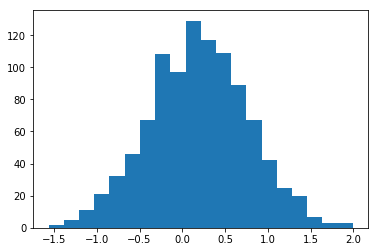

In [68]:
plt.hist(sample, bins=20)


> Missing probability that the coin is biased

> 8/10

### Answer 2.3

Using the prior density as a proposal density, simulate values from the posterior distribution using the SIR algorithm. Approximate the probability that the coin is biased toward heads.

I used this resource for the SIR algorithm: https://learnbayes.wordpress.com/2007/10/07/the-sir-algorithm/.

The three steps I will implement are:
1. We Sample 1000 draws from the proposal density p. We are storing these in the vector theta.
2. We compute Importance sampling weights for this sample equal to the ratios of the target density (g) to the proposal density (p).
3. We resample 1000 draws with replacement from the simulated draws theta.p, where the sampling probabilities are proportional to the weights.

In [91]:
#1. sample 1000 draws from proposal density
n = 1000
theta = np.random.normal(0, .25, size=n)

In [103]:
#2. Compute weights: density of g/p
# Calculate probability under g(theta) = proposal
gvals = np.array([(norm.pdf(t, 0, .25)) for t in theta])
# Calculate probability under f(theta)
fvals = np.array([func_theta(t, 0, .25, 5, 5) for t in theta])
importance_weights = fvals/gvals
p_sir = importance_weights/sum(importance_weights)

In [104]:
theta = np.array(theta,dtype='float64')

In [105]:
p_sir = np.array(p_sir, dtype = "float64")

In [106]:
#3. Resample with sampling probabilities = weights
theta_sir = theta[np.random.choice(range(1000), size=10000, p=p_sir)]

(array([   15.,    54.,   269.,   648.,  1607.,  2263.,  2190.,  1778.,
          940.,   236.]),
 array([-0.73359582, -0.58930677, -0.44501773, -0.30072869, -0.15643964,
        -0.0121506 ,  0.13213845,  0.27642749,  0.42071653,  0.56500558,
         0.70929462]),
 <a list of 10 Patch objects>)

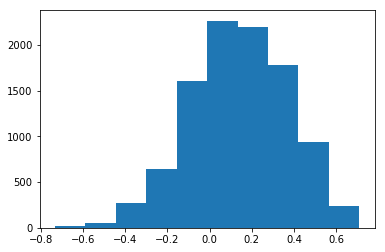

In [107]:
plt.hist(theta_sir)

In [111]:
np.mean(theta_sir)

0.13948600660570751

In [113]:
np.sqrt(np.var(theta_sir))

0.23263985280488314

In [114]:
print("Probability coin is biased", 1-norm.cdf(0, .1395, .2326))

Probability coin is biased 0.725660919123


> Check solutions. 3/5

> Total problem 2 score: 19/25

# Question 3

The goal of this problem is to investigate the role of the proposal distribution in a Metropolis-Hastings algorithm designed to simulate from the posterior distribution of the mixture parameter $\delta$. 

1. Simulate 200 realizations from the mixture distribution:
    $$y_i \sim \delta N(7, 0.5^2) + (1-\delta) N(10, 0.5^2)$$
    with $\delta = 0.7$. Plot a histogram of these data. 
2. Implement a random walk M-H algorithm with proposal $\delta^{\prime} = \delta^{(i)} + \epsilon$ with $\epsilon \sim Unif(−1,1)$. 
3. Reparameterize the problem letting $U = \log\left[\frac{\delta}{1 - \delta}\right]$ and $u^{\prime} = u^{(i)} + \epsilon$. Implement a random walk chain in U-space. 
4. Compare the estimates and convergence behavior of the three algorithms.

In part (1), you are asked to simulate data from a distribution with $\delta$ known. For parts (2)–(3), assume $\delta$ is unknown with prior $\delta \sim Unif( 0,1)$. For parts (2)–(3), provide an appropriate plot and a table summarizing the output of the algorithm. 

To facilitate comparisons, use the same number of iterations, random seed, starting values, and burn-in period for all implementations of the algorithm. 

### Answer 3.1

 Simulate 200 realizations from the mixture distribution:
    $$y_i \sim \delta N(7, 0.5^2) + (1-\delta) N(10, 0.5^2)$$
    with $\delta = 0.7$. Plot a histogram of these data. 

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
delta = .7
from scipy.stats import gamma, norm
s = np.zeros(200)
for i in range(200):
    d = np.random.random()
    if d < .7:
        s[i] = np.random.normal(7, .5)
    else:
        s[i] = np.random.normal(10,.5)

(array([  2.,   5.,  14.,  25.,  33.,  24.,  21.,   2.,   3.,   1.,   0.,
          3.,   6.,   7.,  14.,  16.,  12.,   6.,   5.,   1.]),
 array([  5.6034575 ,   5.89905605,   6.19465461,   6.49025316,
          6.78585171,   7.08145026,   7.37704882,   7.67264737,
          7.96824592,   8.26384448,   8.55944303,   8.85504158,
          9.15064013,   9.44623869,   9.74183724,  10.03743579,
         10.33303434,  10.6286329 ,  10.92423145,  11.21983   ,  11.51542856]),
 <a list of 20 Patch objects>)

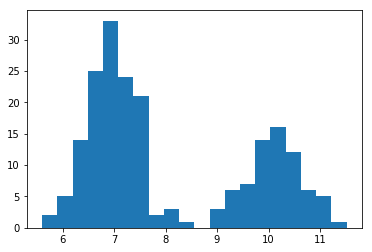

In [13]:
plt.hist(s, bins= 20)

> good! 

>5/5

### Answer 3.2
Implement a random walk M-H algorithm with proposal $\delta^{\prime} = \delta^{(i)} + \epsilon$ with $\epsilon \sim Unif(−1,1)$.

In [26]:
from scipy.stats import distributions

norm = distributions.norm.pdf

#calculating the posterior  
#for each i in y
def calc_posterior(d, y):    
    return sum([np.log(d*norm(i, 7, 0.5) + (1-d)*norm(i, 10, 0.5)) for i in y])

# proposing a new delta mixture parameter  from proposal above
def propose_delta(d):
    while True:
        d_new = d + np.random.uniform(-1, 1)
        if d_new >= 0:
            return d_new  
        
#accepting new delta candidate       
def acceptance(d, candidate, posterior, y):
    #pick a random u and calculate the posterior at that point and the old delta
    u = np.random.rand()
    p = posterior(d, y)
    p_can = posterior(candidate, y)
    if np.log(u) < (p_can - p):
        return candidate
    else:
        return d

In [27]:
def MH_MCMC(d, y, N, calc_posterior, propose_delta, acceptance):
    trace = [d]
    
    while len(trace) < N+1:
        candidate = propose_delta(d)
        d = acceptance(d, candidate, calc_posterior, y)
        trace.append(d)
    return pd.DataFrame(trace, columns=['delta_MH'])
delta1 = pd.DataFrame()
np.random.seed(1)
delta_0 = np.random.uniform(0,1)

In [29]:
deltas = MH_MCMC(delta_0, s, 2000, calc_posterior, propose_delta, acceptance)

(array([   1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           1.,   48.,  127.,   13.,   27.,  131.,  555.,  188.,  284.,
         322.,  179.,  104.,   14.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    7.]),
 array([ 0.417022  ,  0.43144718,  0.44587236,  0.46029754,  0.47472272,
         0.4891479 ,  0.50357308,  0.51799825,  0.53242343,  0.54684861,
         0.56127379,  0.57569897,  0.59012415,  0.60454933,  0.6189745 ,
         0.63339968,  0.64782486,  0.66225004,  0.67667522,  0.6911004 ,
         0.70552557,  0.71995075,  0.73437593,  0.74880111,  0.76322629,
         0.77765147,  0.79207665,  0.80650182,  0.820927  ,  0.83535218,
         0.84977736]),
 <a list of 30 Patch objects>)

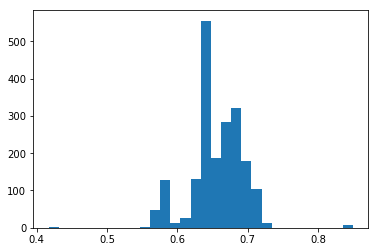

In [36]:
plt.hist(deltas.delta_MH, bins = 30)

> Be sure to look at a trace of the sampling path and then discard your burn-in samples. Otherwise, looks good!

> 8/8

### Answer 3.3
Reparameterize the problem letting $U = \log\left[\frac{\delta}{1 - \delta}\right]$ and $u^{\prime} = u^{(i)} + \epsilon$. Implement a random walk chain in U-space. 

In [30]:
from scipy.stats import distributions
from scipy.special import expit
norm = distributions.norm.pdf

#calculating the posterior  
#for each i in y
def calc_posterior(u, y):  
    #reparameterize this so that d --> U
    #u = logit(d)
    #d = inv_logit(u) = expit function
    return sum([np.log(expit(u)*norm(i, 7, 0.5) + (1-expit(u))*norm(i, 10, 0.5)) for i in y])

# proposing a new delta mixture parameter  from proposal above 
        
#accepting new delta candidate       
def acceptance(u, candidate, posterior, y):
    #pick a random u and calculate the posterior at that point and the old delta
    accept_rate = np.random.rand()
    p = posterior(u, y)
    p_can = posterior(candidate, y)
    if np.log(accept_rate) < (p_can - p):
        return candidate
    else:
        return u
    
def propose_u(u):
    while True:
        u_new = u + np.random.uniform(-1, 1)
        if u_new >= 0:
            return u_new 

In [31]:
def MH_MCMC_u(u, y, N, calc_posterior, propose_delta, acceptance):
    trace = [u]
    
    while len(trace) < N+1:
        candidate = propose_u(u)
        u = acceptance(u, candidate, calc_posterior, y)
        trace.append(u)
    return pd.DataFrame(trace, columns=['u_MH'])
u1 = pd.DataFrame()
np.random.seed(1)
u_0 = np.random.uniform(0,1)

In [37]:
u_df = MH_MCMC_u(u_0, s, 1000, calc_posterior, propose_delta, acceptance)

(array([   3.,   13.,   46.,  131.,  180.,  253.,  196.,  129.,   33.,   17.]),
 array([ 0.1587707 ,  0.24531181,  0.33185293,  0.41839404,  0.50493515,
         0.59147627,  0.67801738,  0.76455849,  0.85109961,  0.93764072,
         1.02418183]),
 <a list of 10 Patch objects>)

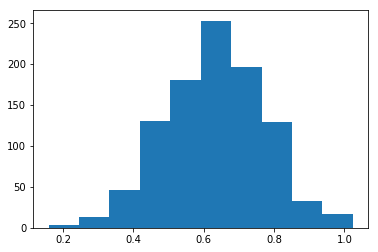

In [38]:
plt.hist(u_df.u_MH)

In [40]:
np.mean(deltas.delta_MH)

0.655406571165849

In [41]:
np.mean(u_df.u_MH)

0.6356267718570422

> Looks good

> 8/8

### Answer 3.4
Compare the estimates and convergence behavior of the three algorithms.

Looking at the means above, the first method gave a closer mean: .655 versus .635. However, the second method with the reparameterization definitely converged better.

> What do you mean by better?

> 2/4

>Total question 3 score: 23/25

# Question 4

Carlin (1992) considers a Bayesian approach to meta-analysis, and includes the following examples of 22 trials of beta-blockers to prevent mortality after myocardial infarction. These data are given below.

In one possible random effects model we assume the true baseline mean (on a log-odds scale) $m_i$ in a trial $i$
is drawn from some population distribution. Let $r^C_i$ denote number of events in the control group in trial $i$, and $r^T_i$ denote events under active treatment in trial $i$. Our model is:

$$\begin{aligned}
r^C_i &\sim \text{Binomial}\left(p^C_i, n^C_i\right) \\
r^T_i &\sim \text{Binomial}\left(p^T_i, n^T_i\right) \\
\text{logit}\left(p^C_i\right) &= \mu_i \\
\text{logit}\left(p^T_i\right) &= \mu_i + \delta \\
\mu_i &\sim \text{Normal}(m, s).
\end{aligned}$$

In this case, we want to make inferences about the population effect $m$, and the predictive distribution for the effect $\delta_{\text{new}}$ in a new trial. 

This particular model uses a random effect for the population mean, and a fixed effect for the treatment effect. There are 3 other models you could fit to represent all possible combinations of fixed or random effects for these two parameters.

Build all 4 models to estimate the treatment effect in PyMC3 and 

1. use convergence diagnostics to check for convergence in each model 
2. use posterior predictive checks to compare the fit of the models
3. use DIC to compare the models as approximations of the true generating model

Which model would you select and why?

In [25]:
r_t_obs = [3, 7, 5, 102, 28, 4, 98, 60, 25, 138, 64, 45, 9, 57, 25, 33, 28, 8, 6, 32, 27, 22]
n_t_obs = [38, 114, 69, 1533, 355, 59, 945, 632, 278,1916, 873, 263, 291, 858, 154, 207, 251, 151, 174, 209, 391, 680]
r_c_obs = [3, 14, 11, 127, 27, 6, 152, 48, 37, 188, 52, 47, 16, 45, 31, 38, 12, 6, 3, 40, 43, 39]
n_c_obs = [39, 116, 93, 1520, 365, 52, 939, 471, 282, 1921, 583, 266, 293, 883, 147, 213, 122, 154, 134, 218, 364, 674]
N = len(n_c_obs)

### Model # 1: Random effect for mean, fixed effect for treatment effect

In [26]:
%matplotlib inline
import numpy as np
import seaborn as sns; sns.set_context('notebook')
from pymc3 import Normal, Binomial, sample, Model
from pymc3.math import invlogit

with Model() as beta_blockers_RF:
    m = pm.Normal('m', 0, sd = 10)
    s = pm.Normal('s', 0, sd = 10)
    mu = pm.Normal('mu', m, sd = s)
    delta = pm.Normal('delta', 0, sd = 10)
    pc = pm.invlogit(np.array(mu))
    pt = pm.invlogit(np.array(mu)+np.array(delta))
    rc = pm.Binomial('rc', n_c_obs, pc, observed = np.array(r_c_obs))
    rt = pm.Binomial('rt', n_t_obs, pt, observed = np.array(r_t_obs))



In [35]:
with beta_blockers_RF:
        trace_1 = sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 99%|█████████▉| 10427/10500 [00:16<00:00, 746.16it/s]/anaconda/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 3272 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 10500/10500 [00:16<00:00, 650.18it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118b6b710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119292320>]], dtype=object)

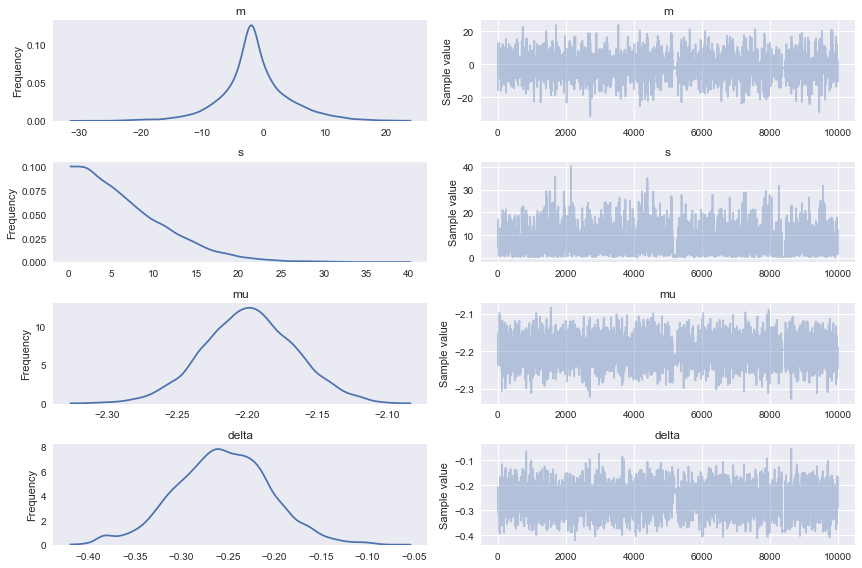

In [36]:
%matplotlib inline
pm.traceplot(trace_1)

#### Checking for Convergence

To check for convergence of the model, I split the trace into groups of 500. If the model has converged, the distribution of each of those groups should look the same.

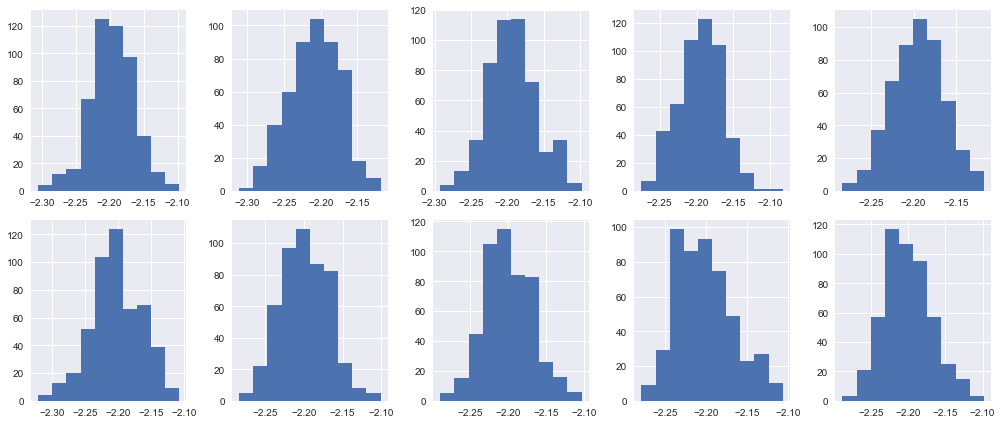

In [41]:
import matplotlib.pyplot as plt

mu_trace = trace_1['mu']

fig, axes = plt.subplots(2, 5, figsize=(14,6))
axes = axes.ravel()
for i in range(10):
    axes[i].hist(mu_trace[500*i:500*(i+1)])
plt.tight_layout()

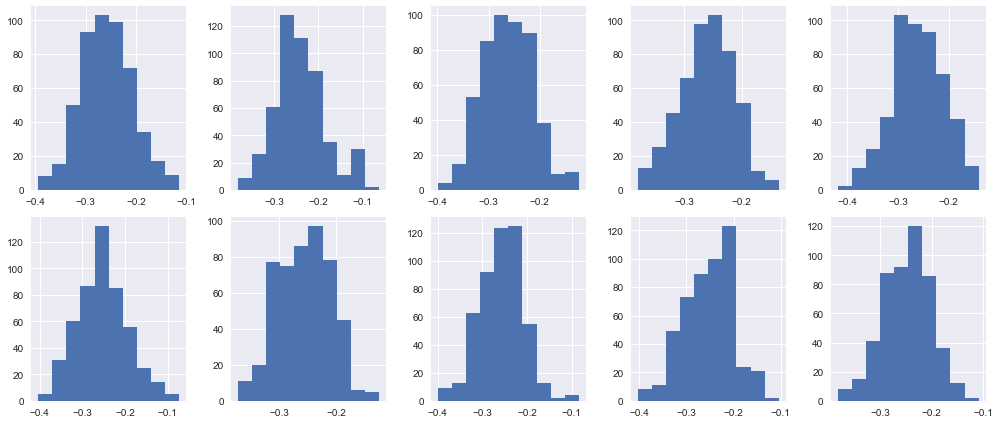

In [39]:
import matplotlib.pyplot as plt

delta_trace = trace_1['delta']

fig, axes = plt.subplots(2, 5, figsize=(14,6))
axes = axes.ravel()
for i in range(10):
    axes[i].hist(delta_trace[500*i:500*(i+1)])
plt.tight_layout()

This model is relatively converged; doesn't look as great as the one in class (meaning the graphs above are not all identical), but it is not wilding diverging either. 

#### Goodness of Fit

To check for goodness of fit, I implemented sample_ppc (posterior predictive check). It generates data sets from the model using parameter settings from draws from the posterior. I then plotted the average of the observed RC (or RT) data as a line over the distribution of means for the ppc sample RC (or RT) values. 

In [42]:
from pymc3 import sample_ppc

with beta_blockers_RF:
    bb_sim_RF = sample_ppc(trace_1, samples=500)

100%|██████████| 500/500 [00:01<00:00, 412.33it/s]


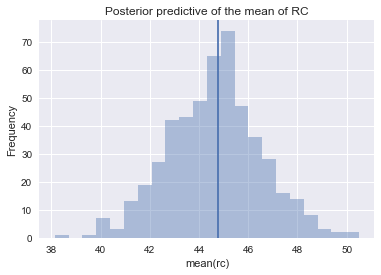

In [58]:
ax = plt.subplot()
sns.distplot([r.mean() for r in bb_sim_RF['rc']], kde=False, ax=ax)
ax.axvline(np.array(r_c_obs).mean())
ax.set(title='Posterior predictive of the mean of RC', xlabel='mean(rc)', ylabel='Frequency')

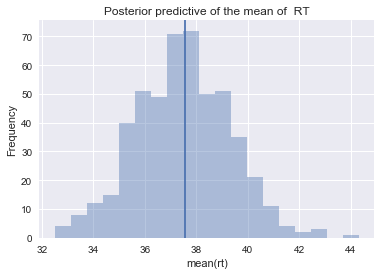

In [57]:
ax = plt.subplot()
sns.distplot([r.mean() for r in bb_sim_RF['rt']], kde=False, ax=ax)
ax.axvline(np.array(r_t_obs).mean())
ax.set(title='Posterior predictive of the mean of  RT', xlabel='mean(rt)', ylabel='Frequency')

Both of these models fit the data relatively well.

### Model 2: Random effect for mean and treatment effect

In [60]:
%matplotlib inline
import numpy as np
import seaborn as sns; sns.set_context('notebook')
from pymc3 import Normal, Binomial, sample, Model
from pymc3.math import invlogit

with Model() as beta_blockers_RR:
    m = pm.Normal('m', 0, sd = 10)
    s = pm.Normal('s', 0, sd = 10)
    mu = pm.Normal('mu', m, sd = s)
    delta = pm.Normal('delta', m, sd = s)
    pc = pm.invlogit(np.array(mu))
    pt = pm.invlogit(np.array(mu)+np.array(delta))
    rc = pm.Binomial('rc', n_c_obs, pc, observed = np.array(r_c_obs))
    rt = pm.Binomial('rt', n_t_obs, pt, observed = np.array(r_t_obs))


In [61]:
with beta_blockers_RR:
        trace_2 = sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████▉| 10469/10500 [00:14<00:00, 724.58it/s]/anaconda/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.659140325578, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
/anaconda/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 3112 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 10500/10500 [00:14<00:00, 714.28it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11707a278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11752f1d0>]], dtype=object)

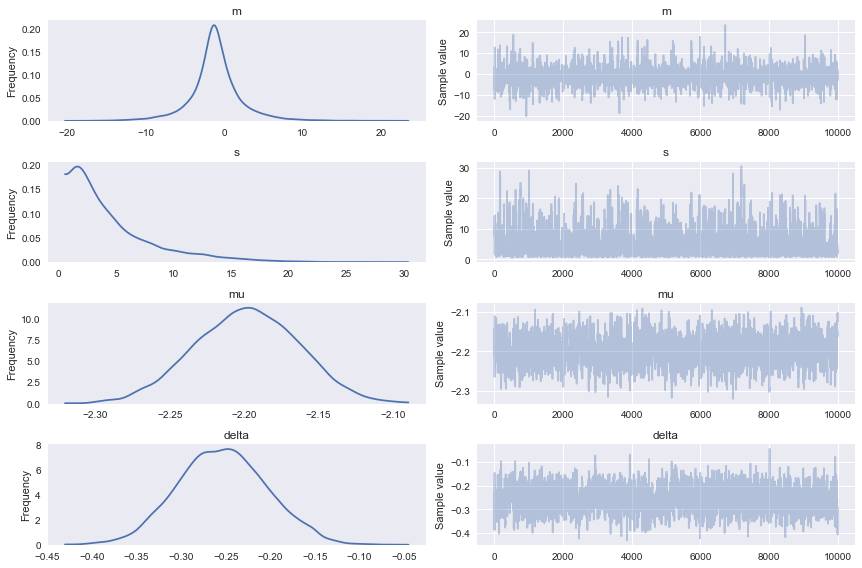

In [62]:
%matplotlib inline
pm.traceplot(trace_2)

#### Checking for Convergence

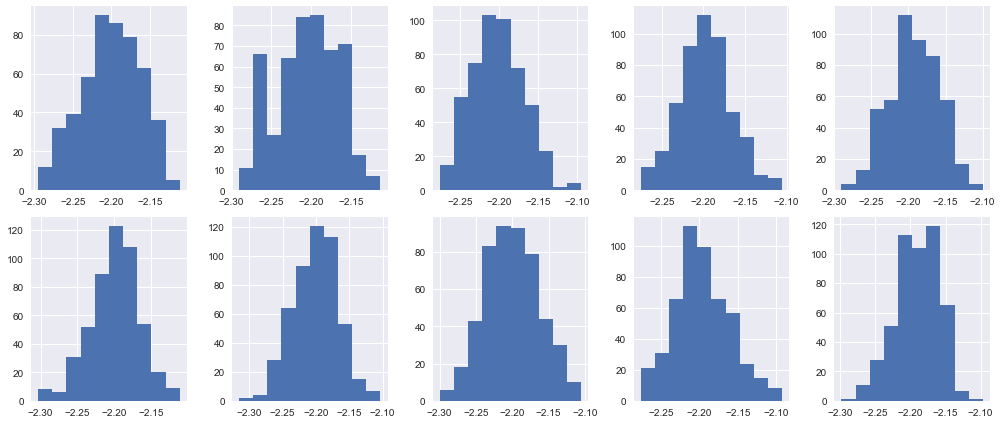

In [63]:
import matplotlib.pyplot as plt

mu_trace = trace_2['mu']

fig, axes = plt.subplots(2, 5, figsize=(14,6))
axes = axes.ravel()
for i in range(10):
    axes[i].hist(mu_trace[500*i:500*(i+1)])
plt.tight_layout()

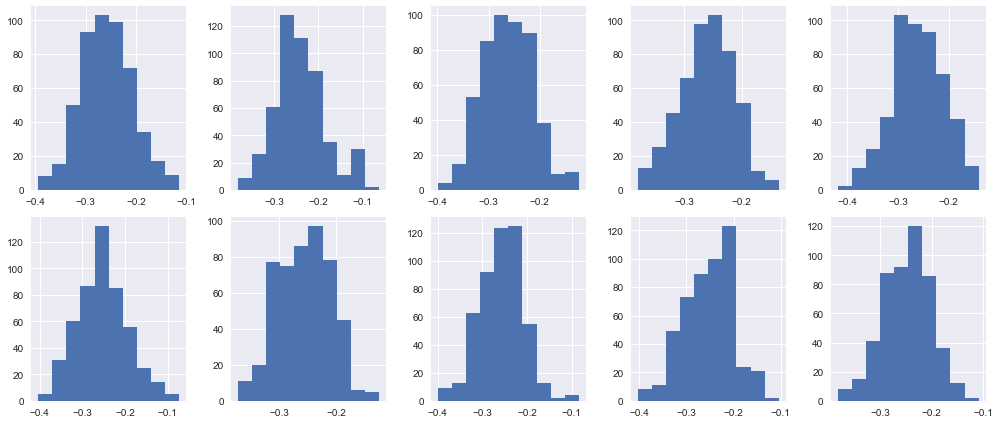

In [64]:
import matplotlib.pyplot as plt

delta_trace = trace_1['delta']

fig, axes = plt.subplots(2, 5, figsize=(14,6))
axes = axes.ravel()
for i in range(10):
    axes[i].hist(delta_trace[500*i:500*(i+1)])
plt.tight_layout()

This model also didn't completely converge. The graphs for slices of 500 points from the trace are similar to each other but not exactly the same. I would say the convergence of this model is similar to the first model. 

#### Goodness of Fit

In [66]:
from pymc3 import sample_ppc

with beta_blockers_RR:
    bb_sim_RF = sample_ppc(trace_2, samples=500)

100%|██████████| 500/500 [00:00<00:00, 1617.78it/s]


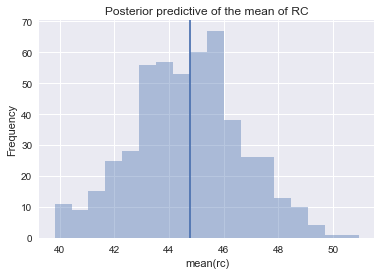

In [67]:
ax = plt.subplot()
sns.distplot([r.mean() for r in bb_sim_RF['rc']], kde=False, ax=ax)
ax.axvline(np.array(r_c_obs).mean())
ax.set(title='Posterior predictive of the mean of RC', xlabel='mean(rc)', ylabel='Frequency')

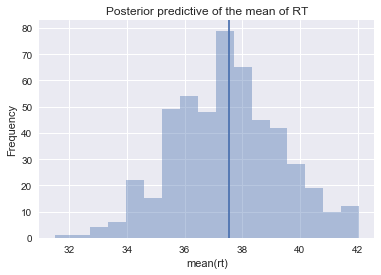

In [70]:
ax = plt.subplot()
sns.distplot([r.mean() for r in bb_sim_RF['rt']], kde=False, ax=ax)
ax.axvline(np.array(r_t_obs).mean())
ax.set(title='Posterior predictive of the mean of RT', xlabel='mean(rt)', ylabel='Frequency')

Again, the model fits the data pretty well. I would say the first model fit the data better.

### Model 3: Fixed effect for mean and random for treatment effect

In [73]:
%matplotlib inline
import numpy as np
import seaborn as sns; sns.set_context('notebook')
from pymc3 import Normal, Binomial, sample, Model
from pymc3.math import invlogit

with Model() as beta_blockers_FR:
    m = pm.Normal('m', 0, sd = 10)
    s = pm.Normal('s', 0, sd = 10)
    mu = pm.Normal('mu', 0, sd = 10)
    delta = pm.Normal('delta', m, sd = s)
    pc = pm.invlogit(np.array(mu))
    pt = pm.invlogit(np.array(mu)+np.array(delta))
    rc = pm.Binomial('rc', n_c_obs, pc, observed = np.array(r_c_obs))
    rt = pm.Binomial('rt', n_t_obs, pt, observed = np.array(r_t_obs))


In [74]:
with beta_blockers_FR:
        trace_3 = sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████▉| 10479/10500 [00:16<00:00, 758.21it/s]/anaconda/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 3397 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 10500/10500 [00:16<00:00, 646.10it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119ec4b70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b5f45c0>]], dtype=object)

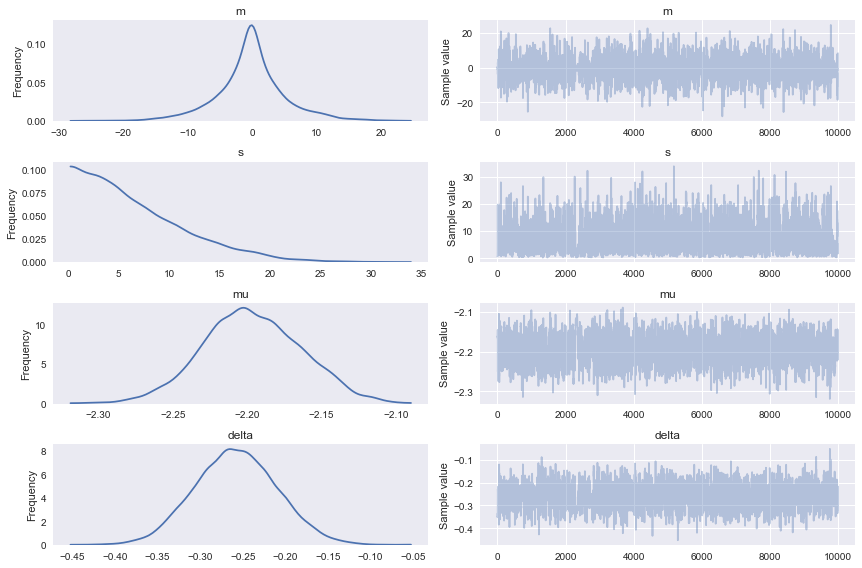

In [75]:
%matplotlib inline
pm.traceplot(trace_3)

#### Checking for Convergence

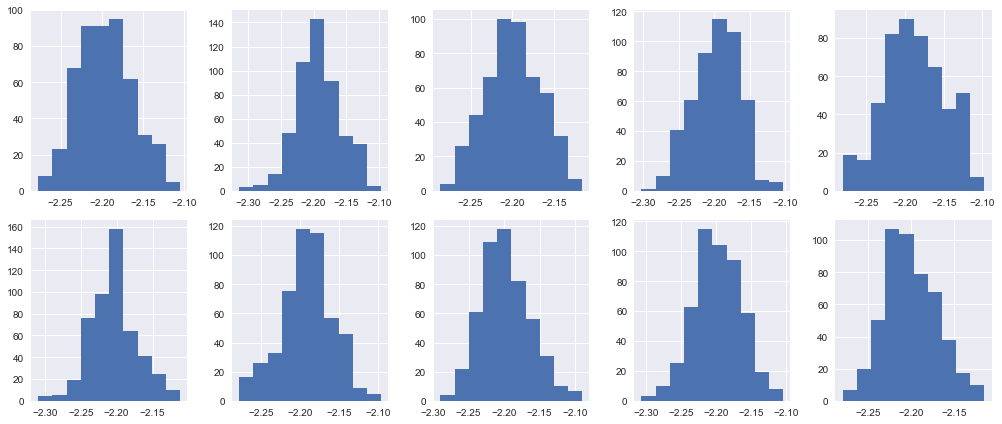

In [76]:
import matplotlib.pyplot as plt

mu_trace = trace_3['mu']

fig, axes = plt.subplots(2, 5, figsize=(14,6))
axes = axes.ravel()
for i in range(10):
    axes[i].hist(mu_trace[500*i:500*(i+1)])
plt.tight_layout()

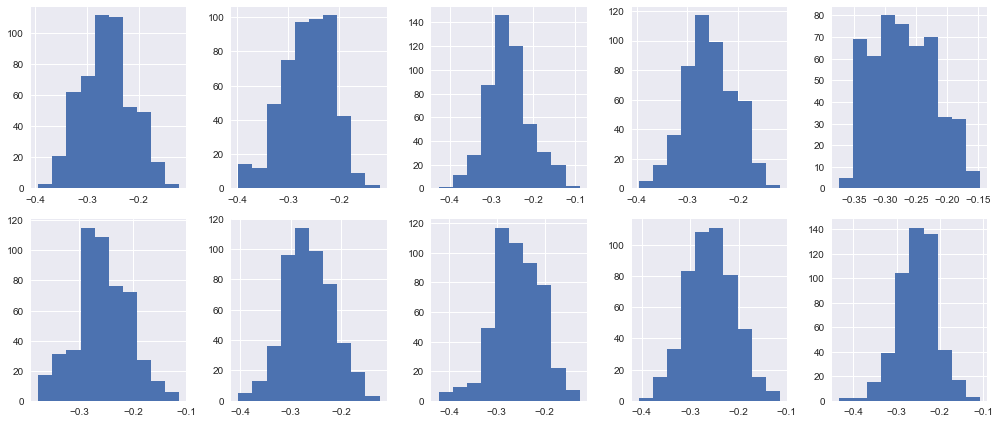

In [77]:
import matplotlib.pyplot as plt

delta_trace = trace_3['delta']

fig, axes = plt.subplots(2, 5, figsize=(14,6))
axes = axes.ravel()
for i in range(10):
    axes[i].hist(delta_trace[500*i:500*(i+1)])
plt.tight_layout()

This model converges the best so far of the three for both mu and delta. 

#### Goodness of Fit

In [78]:
from pymc3 import sample_ppc

with beta_blockers_FR:
    bb_sim_FR = sample_ppc(trace_3, samples=500)

100%|██████████| 500/500 [00:00<00:00, 1589.45it/s]


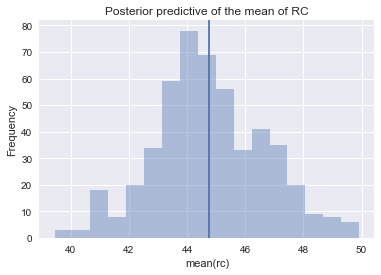

In [81]:
ax = plt.subplot()
sns.distplot([r.mean() for r in bb_sim_FR['rc']], kde=False, ax=ax)
ax.axvline(np.array(r_c_obs).mean())
ax.set(title='Posterior predictive of the mean of RC', xlabel='mean(rc)', ylabel='Frequency')

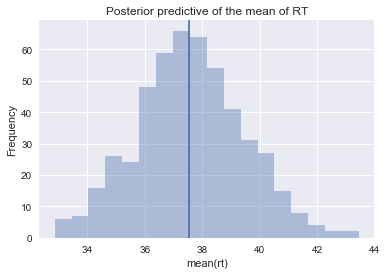

In [82]:
ax = plt.subplot()
sns.distplot([r.mean() for r in bb_sim_FR['rt']], kde=False, ax=ax)
ax.axvline(np.array(r_t_obs).mean())
ax.set(title='Posterior predictive of the mean of RT', xlabel='mean(rt)', ylabel='Frequency')

The model fits for this one looked similar to the second model, with a slightly smaller spread (by eye).

### Model 4: Fixed for both mean and treatment effect

In [83]:
%matplotlib inline
import numpy as np
import seaborn as sns; sns.set_context('notebook')
from pymc3 import Normal, Binomial, sample, Model
from pymc3.math import invlogit

with Model() as beta_blockers_FF:
    m = pm.Normal('m', 0, sd = 10)
    s = pm.Normal('s', 0, sd = 10)
    mu = pm.Normal('mu', 0, sd = 10)
    delta = pm.Normal('delta', 0, sd = 10)
    pc = pm.invlogit(np.array(mu))
    pt = pm.invlogit(np.array(mu)+np.array(delta))
    rc = pm.Binomial('rc', n_c_obs, pc, observed = np.array(r_c_obs))
    rt = pm.Binomial('rt', n_t_obs, pt, observed = np.array(r_t_obs))


In [85]:
with beta_blockers_FF:
        trace_4 = sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 10500/10500 [00:09<00:00, 1108.48it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cc8f6a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b463c50>]], dtype=object)

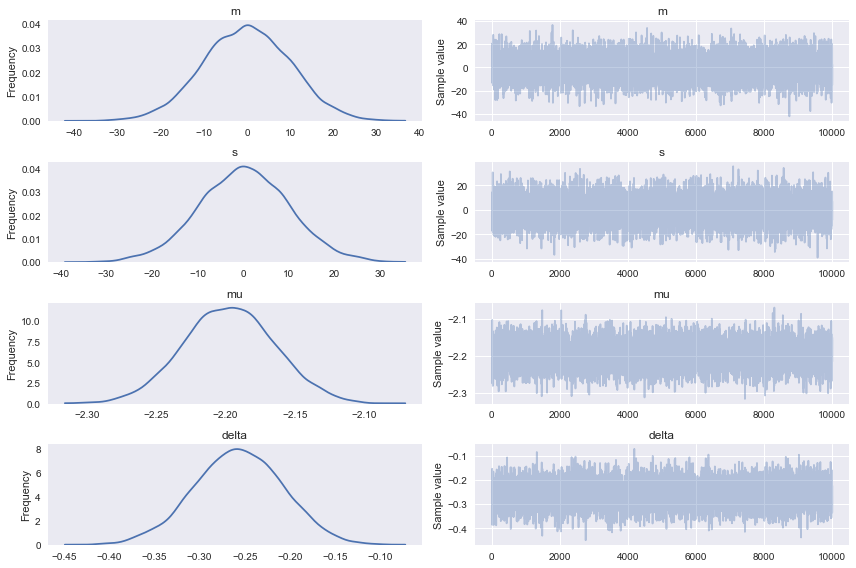

In [86]:
%matplotlib inline
pm.traceplot(trace_4)

#### Checking for Convergence

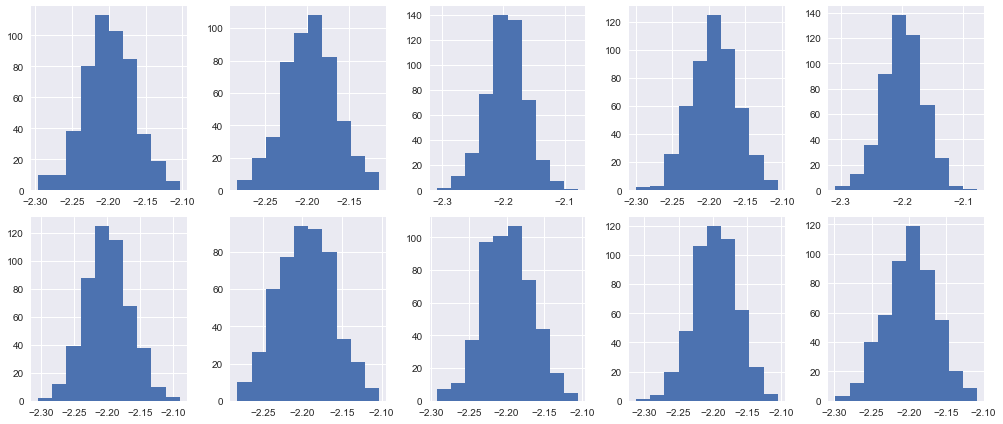

In [88]:
import matplotlib.pyplot as plt

mu_trace = trace_4['mu']

fig, axes = plt.subplots(2, 5, figsize=(14,6))
axes = axes.ravel()
for i in range(10):
    axes[i].hist(mu_trace[500*i:500*(i+1)])
plt.tight_layout()

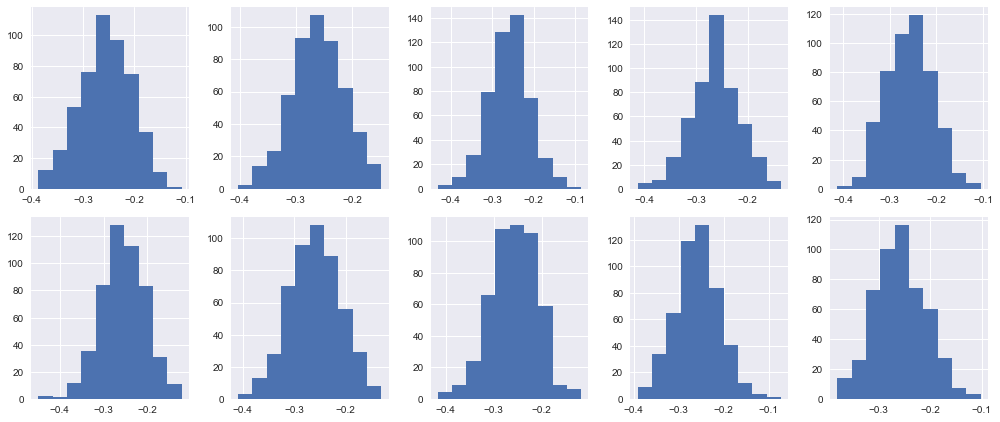

In [89]:
import matplotlib.pyplot as plt

delta_trace = trace_4['delta']

fig, axes = plt.subplots(2, 5, figsize=(14,6))
axes = axes.ravel()
for i in range(10):
    axes[i].hist(delta_trace[500*i:500*(i+1)])
plt.tight_layout()

This model converges the best of all the models. Each of the groups of 500 points from the trace look similar, suggesting model convergence.

#### Goodness of Fit

In [90]:
from pymc3 import sample_ppc

with beta_blockers_FF:
    bb_sim_FF = sample_ppc(trace_4, samples=500)

100%|██████████| 500/500 [00:00<00:00, 1592.54it/s]


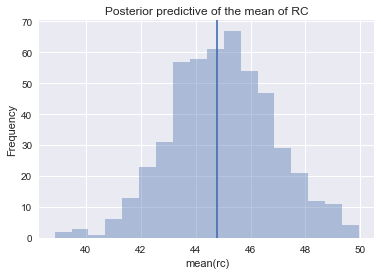

In [91]:
ax = plt.subplot()
sns.distplot([r.mean() for r in bb_sim_FF['rc']], kde=False, ax=ax)
ax.axvline(np.array(r_c_obs).mean())
ax.set(title='Posterior predictive of the mean of RC', xlabel='mean(rc)', ylabel='Frequency')

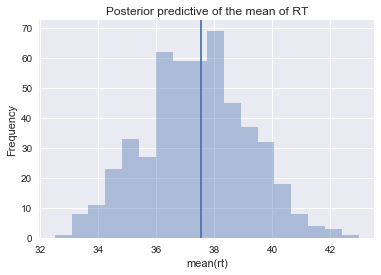

In [92]:
ax = plt.subplot()
sns.distplot([r.mean() for r in bb_sim_FF['rt']], kde=False, ax=ax)
ax.axvline(np.array(r_t_obs).mean())
ax.set(title='Posterior predictive of the mean of RT', xlabel='mean(rt)', ylabel='Frequency')

The spread is a little bit wider for both of these plots than for the other models.

### Comparing DIC Values for Each Model

In [95]:
dic_RF = pm.dic(trace_1, beta_blockers_RF)
dic_RR = pm.dic(trace_2, beta_blockers_RR)
dic_FR = pm.dic(trace_3, beta_blockers_FR)
dic_FF = pm.dic(trace_4, beta_blockers_FF)
print(dic_RF, dic_RR, dic_FR, dic_FF)

553.832497195 550.866673352 553.862945525 556.852265174


The second model has the lowest DIC value, meaning it has the least divergence from the actual data. All of the values are similar, however, and relatively high. They may all be similar because we are only changing two parameters between them. I would say that the second or last model is best. Though the second is more accurate, the last model converged the most. 

### Comparing treatment effects between models

In [98]:
print(pm.df_summary(trace_1))
print(pm.df_summary(trace_2))
print(pm.df_summary(trace_3))
print(pm.df_summary(trace_4))

           mean        sd  mc_error    hpd_2.5   hpd_97.5
m     -1.575252  5.514132  0.099437 -13.047798  10.640999
s      6.743931  5.269406  0.161857   0.197228  16.939546
mu    -2.198520  0.032815  0.000833  -2.264448  -2.135100
delta -0.256421  0.050834  0.001558  -0.355001  -0.151657
           mean        sd  mc_error   hpd_2.5   hpd_97.5
m     -1.056850  3.316536  0.051243 -8.404308   6.009382
s      4.643457  3.919636  0.118025  0.530972  12.862397
mu    -2.198874  0.034802  0.001059 -2.271005  -2.135805
delta -0.254532  0.049952  0.001478 -0.343994  -0.153229
           mean        sd  mc_error    hpd_2.5   hpd_97.5
m     -0.362717  5.462812  0.108440 -12.163420  11.412326
s      6.778582  5.215943  0.149416   0.262379  16.877661
mu    -2.197493  0.033816  0.000709  -2.263690  -2.131235
delta -0.257223  0.050349  0.001124  -0.351505  -0.154823
           mean        sd  mc_error    hpd_2.5   hpd_97.5
m     -0.068543  9.982813  0.108769 -19.539470  19.668802
s      0.046164  9.

All of the models gave very similar results for mu and delta, even as m and s changed a lot between them. The effect of treatment on the outcome was about -.25 for each model, and the effect of the population was about -2.19.

> Looks good although I will make one suggestion. Typically we assign priors that have the same support as the parameter of interest. I noticed that you put a zero mean prior on the standard deviation parameters of these models. We never expect the variance of a normal to be negative, so a more appropriate prior would be something like the half-cauchy. 

>Also, for the random means, I noticed that you only specifed one mean instead of one for each (in your mu call, you should've specifiec shape = N in that case). Otherwise nice job.

20/25

> Total Homework 2 score: 87/100